In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuración visual
sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (10,6)

# Cargar datasets generados en la Fase 2
cohorts = pd.read_csv("../data/cohorts/retention_cohorts.csv")
metrics = pd.read_csv("../data/cohorts/user_retention_metrics.csv")

print(f"Cohortes cargadas: {len(cohorts):,} filas")
print(f"Métricas individuales cargadas: {len(metrics):,} usuarios")
cohorts.head()


Cohortes cargadas: 184 filas
Métricas individuales cargadas: 5,000 usuarios


,cohort_month,event_month,active_users,cohort_size,retention_rate
0,2024-01,2025-01,469,734,0.638965
1,2024-01,2025-02,429,734,0.584469
2,2024-01,2025-03,450,734,0.613079
3,2024-01,2025-04,425,734,0.579019
4,2024-01,2025-05,433,734,0.589918


In [4]:
# Convertir columnas de tipo Period a string si es necesario
cohorts["cohort_month"] = cohorts["cohort_month"].astype(str)
cohorts["event_month"] = cohorts["event_month"].astype(str)

# Crear matriz de retención
retention_matrix = cohorts.pivot(
    index="cohort_month", columns="event_month", values="retention_rate"
).fillna(0)

# Ordenar cronológicamente
retention_matrix = retention_matrix.sort_index(axis=0).sort_index(axis=1)
retention_matrix.head()


event_month,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07,2025-08,2025-09,2025-10
cohort_month,,,,,,,,,,
2024-01,0.638965,0.584469,0.613079,0.579019,0.589918,0.579019,0.508174,0.418256,0.306540,0.104905
2024-02,0.650582,0.584027,0.603993,0.577371,0.574043,0.539101,0.522463,0.469218,0.319468,0.094842
2024-03,0.620890,0.607350,0.611219,0.564797,0.568665,0.533849,0.510638,0.439072,0.319149,0.094778
2024-04,0.630979,0.562642,0.621868,0.624146,0.608200,0.555809,0.507973,0.414579,0.302961,0.059226
2024-05,0.588972,0.593985,0.611529,0.588972,0.551378,0.556391,0.516291,0.468672,0.333333,0.085213


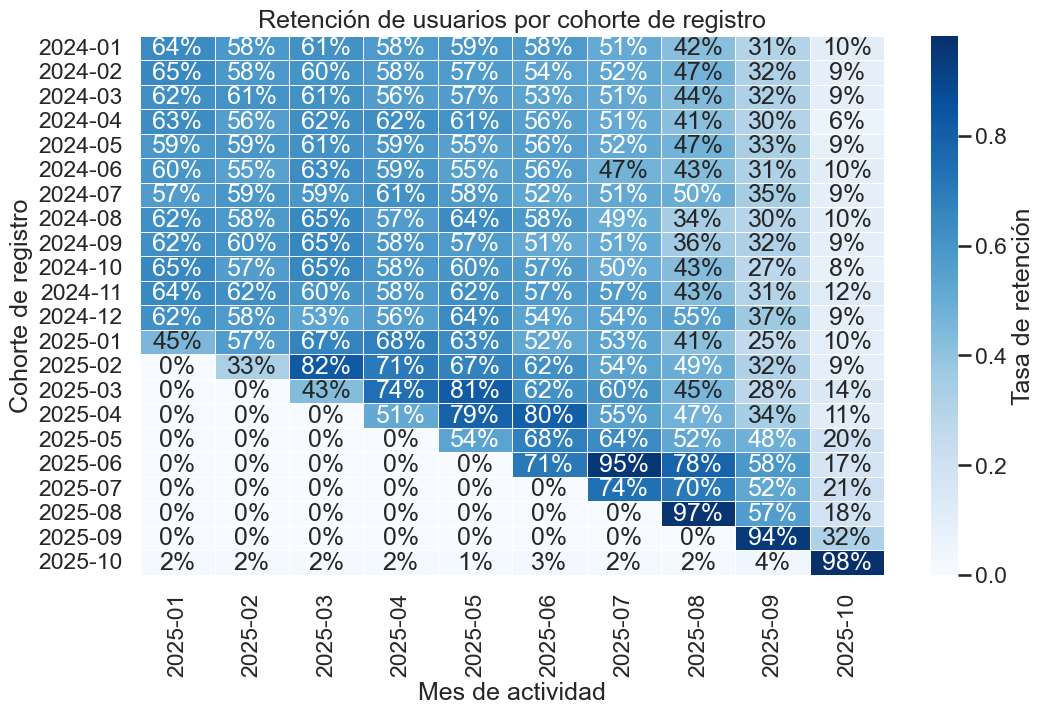

In [5]:
plt.figure(figsize=(12,7))
sns.heatmap(
    retention_matrix, 
    annot=True, fmt=".0%", cmap="Blues", linewidths=0.5, cbar_kws={"label": "Tasa de retención"}
)
plt.title("Retención de usuarios por cohorte de registro", fontsize=18)
plt.xlabel("Mes de actividad")
plt.ylabel("Cohorte de registro")
plt.show()


Tasa promedio de retención D7:  9.6%
Tasa promedio de retención D30: 15.2%
Tasa promedio de churn 30d:     5.7%


C:\Users\Setoro\AppData\Local\Temp\ipykernel_26492\4263698929.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["D7", "D30", "Churn 30d"], y=[d7_rate, d30_rate, churn_rate], palette="crest", ax=ax)


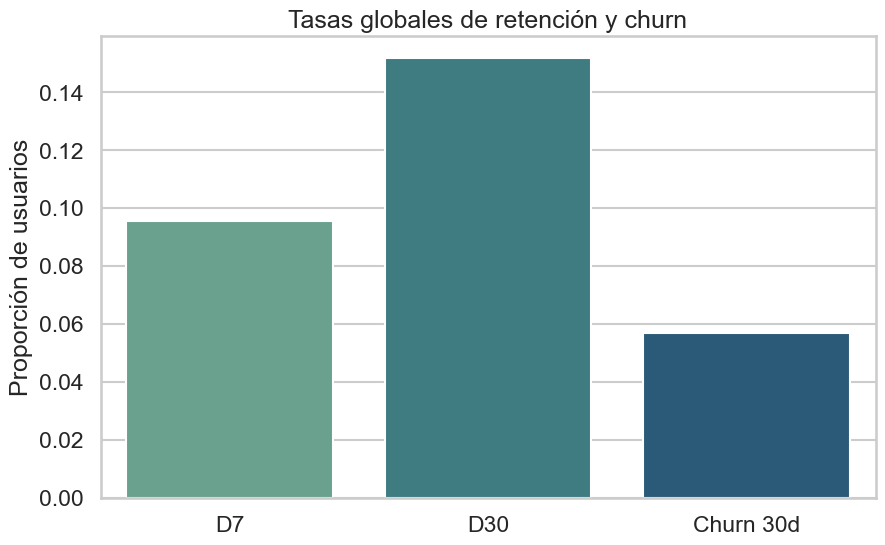

In [6]:
# Calcular tasas promedio
d7_rate = (metrics["events_D7"] > 0).mean()
d30_rate = (metrics["events_D30"] > 0).mean()
churn_rate = metrics["churn_30d"].mean()

print(f"Tasa promedio de retención D7:  {d7_rate:.1%}")
print(f"Tasa promedio de retención D30: {d30_rate:.1%}")
print(f"Tasa promedio de churn 30d:     {churn_rate:.1%}")

# Visualizar
fig, ax = plt.subplots()
sns.barplot(x=["D7", "D30", "Churn 30d"], y=[d7_rate, d30_rate, churn_rate], palette="crest", ax=ax)
ax.set_title("Tasas globales de retención y churn")
ax.set_ylabel("Proporción de usuarios")
plt.show()


C:\Users\Setoro\AppData\Local\Temp\ipykernel_26492\1414584921.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


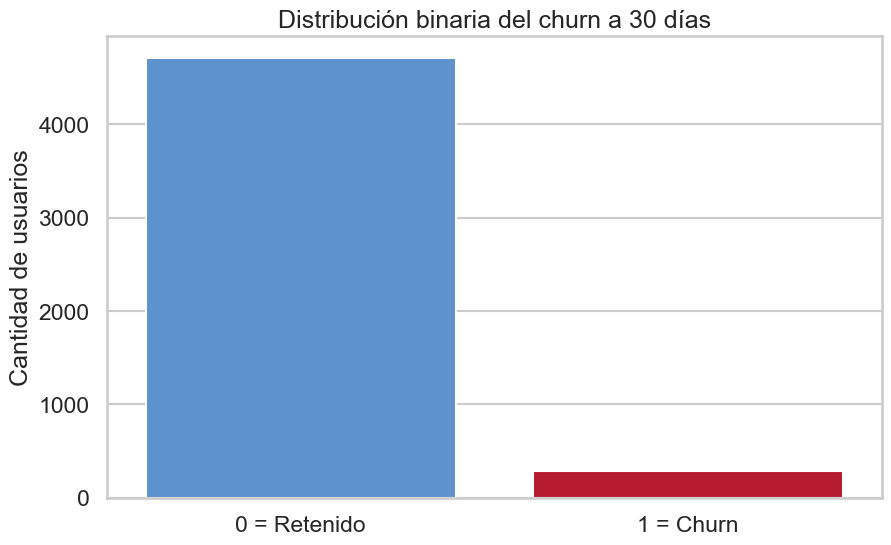

In [9]:
# Recuento de churn y retenidos
churn_counts = metrics["churn_30d"].value_counts().sort_index()

sns.barplot(
    x=["0 = Retenido", "1 = Churn"],
    y=churn_counts.values,
    palette=["#4a90e2", "#d0021b"]
)
plt.title("Distribución binaria del churn a 30 días")
plt.xlabel("")
plt.ylabel("Cantidad de usuarios")
plt.show()

In [8]:
summary = {
    "Usuarios totales": len(metrics),
    "Tasa D7": f"{(metrics['events_D7'] > 0).mean():.1%}",
    "Tasa D30": f"{(metrics['events_D30'] > 0).mean():.1%}",
    "Tasa Churn 30d": f"{metrics['churn_30d'].mean():.1%}",
    "Fecha de análisis": datetime.now().strftime("%Y-%m-%d %H:%M")
}

pd.DataFrame([summary]).to_csv("../docs/QA_retention_summary.csv", index=False)
summary


{'Usuarios totales': 5000,
 'Tasa D7': '9.6%',
 'Tasa D30': '15.2%',
 'Tasa Churn 30d': '5.7%',
 'Fecha de análisis': '2025-10-26 13:03'}